In [1]:
# Custom libraries
from datascienceutils import plotter
from datascienceutils import analyze

# Standard libraries
import json
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import random


from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.charts import Histogram
import bokeh
output_notebook(bokeh.resources.INLINE)


/home/anand/playspace/data-science-utils/.eggs/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/anand/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


ModuleNotFoundError: No module named 'bokeh.mpl'

In [5]:
irisDf = pd.read_csv('./data/Iris.csv')
# Sample Timeseries  picked from here https://www.backblaze.com/b2/hard-drive-test-data.html
hdd2013Df = pd.read_csv('./data/hdd_2013/2013-11-26.csv')

In [9]:
# Create classes for showing off correlation_analyze's heatmapping ability
def createClasses(x):
    rdm = random.random()
    if rdm < 0.3:
        return 'A'
    elif rdm > 0.3 and rdm < 0.6:
        return 'B' 
    else:
        return 'C'
irisDf['Species'] = irisDf['Class'].apply(createClasses)

In [7]:
irisDf.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
irisDf.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
irisDf.var()

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64

In [11]:
irisDf.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [12]:
irisDf.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [13]:
numericalCols = irisDf.select_dtypes(include=[np.number]).columns

# Correlation btw Numerical Columns


# Correlation btw Columns Species & Class by measure PetalLengthCm


AttributeError: 'pandas._libs.interval.Interval' object has no attribute 'split'

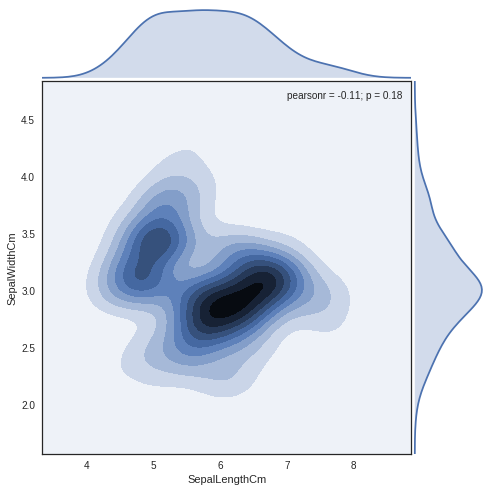

In [14]:
import itertools
for combo in itertools.combinations(numericalCols, 2):
    analyze.correlation_analyze(irisDf, combo[0], combo[1],
                                categories=['Species', 'Class'], 
                                measures=['PetalLengthCm', 'PetalWidthCm'])

Variance of PetalLengthCm
3.1131794183445156
Skewness of PetalLengthCm
-0.274464252474
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=0.87653284874772308, pvalue=0.0)
Anderson-Darling normality test on PetalLengthCm 
Statistic: 7.672883 
 p-value: 0.000000



/home/anandjeyahar/anaconda3/lib/python3.6/site-packages/bokeh/core/compat/bokeh_renderer.py:263: UserWarning: Path marker shapes currently not handled, defaulting to Circle
  warnings.warn("Path marker shapes currently not handled, defaulting to Circle")
/home/anandjeyahar/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)
/home/anandjeyahar/anaconda3/lib/python3.6/site-packages/bokeh/core/compat/bokeh_renderer.py:296: UserWarning: Path marker sizes support is limited and may not display as expected
  warnings.warn("Path marker sizes support is limited and may not display as expected")


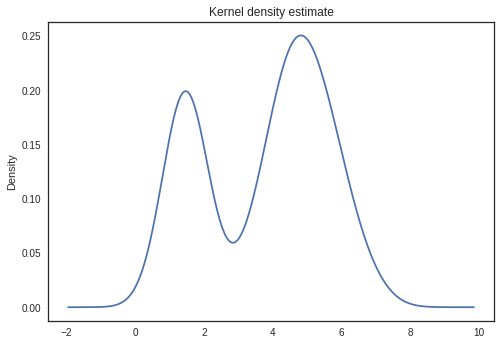

In [15]:
plotter.show(analyze.dist_analyze(irisDf, 'PetalLengthCm'))

Variance of SepalLengthCm
0.6856935123042505
Skewness of SepalLengthCm
0.314910956637
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=0.99999146009452899, pvalue=0.0)
Anderson-Darling normality test on SepalLengthCm 
Statistic: 0.889199 
 p-value: 0.022511



/home/anandjeyahar/anaconda3/lib/python3.6/site-packages/bokeh/core/compat/bokeh_renderer.py:263: UserWarning: Path marker shapes currently not handled, defaulting to Circle
  warnings.warn("Path marker shapes currently not handled, defaulting to Circle")
/home/anandjeyahar/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)
/home/anandjeyahar/anaconda3/lib/python3.6/site-packages/bokeh/core/compat/bokeh_renderer.py:296: UserWarning: Path marker sizes support is limited and may not display as expected
  warnings.warn("Path marker sizes support is limited and may not display as expected")


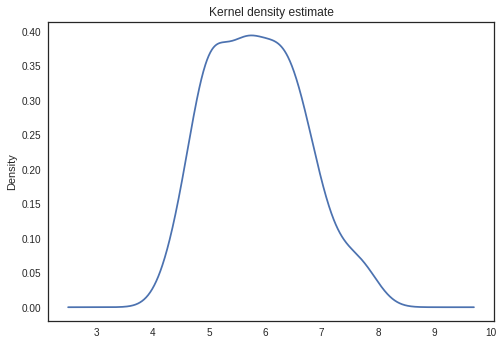

In [16]:
plotter.show(analyze.dist_analyze(irisDf, 'SepalLengthCm'))

Variance of PetalLengthCm
3.1131794183445156
Skewness of PetalLengthCm
-0.274464252474
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=0.87653284874772308, pvalue=0.0)
Anderson-Darling normality test on PetalLengthCm 
Statistic: 7.672883 
 p-value: 0.000000



/home/anandjeyahar/anaconda3/lib/python3.6/site-packages/bokeh/core/compat/bokeh_renderer.py:263: UserWarning: Path marker shapes currently not handled, defaulting to Circle
  warnings.warn("Path marker shapes currently not handled, defaulting to Circle")
/home/anandjeyahar/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)
/home/anandjeyahar/anaconda3/lib/python3.6/site-packages/bokeh/core/compat/bokeh_renderer.py:296: UserWarning: Path marker sizes support is limited and may not display as expected
  warnings.warn("Path marker sizes support is limited and may not display as expected")


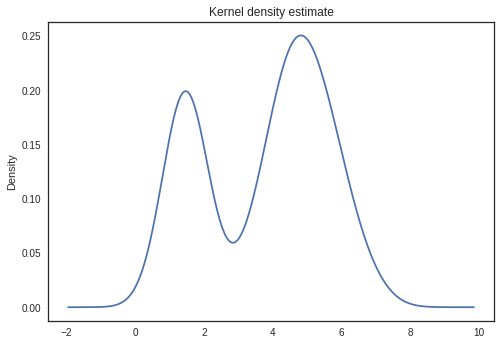

In [17]:
plotter.show(analyze.dist_analyze(irisDf, 'PetalLengthCm'))

In [19]:
analyze.regression_analyze(irisDf, 'SepalLengthCm', 'SepalWidthCm', check_vif=False, check_heteroskedasticity=False)

P-value and test statistic for distribution similarity between SepalLengthCm and SepalWidthCm
(0.0, 2.7893333333333334)
Regression Score: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
0.0119616328348
Regression Score: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
0.0119605090125
Regression Score: RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)
0.011866561425
Regression Score: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
0.0
Regression Score: ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_sta

/home/anandjeyahar/anaconda3/lib/python3.6/site-packages/datascienceutils-1.2.13-py3.6.egg/datascienceutils/predictiveModels.py:31: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [20]:
irisDf.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class,Species
0,5.1,3.5,1.4,0.2,Iris-setosa,A
1,4.9,3.0,1.4,0.2,Iris-setosa,A
2,4.7,3.2,1.3,0.2,Iris-setosa,C
3,4.6,3.1,1.5,0.2,Iris-setosa,C
4,5.0,3.6,1.4,0.2,Iris-setosa,C


In [21]:
irisDf.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class,Species
145,6.7,3.0,5.2,2.3,Iris-virginica,A
146,6.3,2.5,5.0,1.9,Iris-virginica,B
147,6.5,3.0,5.2,2.0,Iris-virginica,C
148,6.2,3.4,5.4,2.3,Iris-virginica,A
149,5.9,3.0,5.1,1.8,Iris-virginica,B


In [22]:
plotter.show(analyze.fractal_analyze(irisDf, 'SepalLengthCm'))

AttributeError: 'NoneType' object has no attribute 'references'

In [23]:
print(analyze.fractal_dimension(irisDf[['SepalLengthCm', 'PetalLengthCm']].as_matrix()))

TypeError: expected non-empty vector for x

In [24]:
hdd2013Df.fillna(value=0, inplace=True)
hdd2013Df.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,2.655000e+04,26550.000000,26550.0,2.655000e+04,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,...,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0
mean,2.895978e+12,0.000151,0.0,5.556346e+07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,8.723011e+11,0.012274,0.0,7.741375e+07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000205e+12,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000399e+12,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.000593e+12,0.000000,0.0,1.025500e+03,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4.000787e+12,0.000000,0.0,1.092058e+08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4.000787e+12,1.000000,0.0,1.041384e+09,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
hdd2013Df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2013-11-26,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-11-26,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-11-26,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-11-26,PL1321LAG34XWH,Hitachi HDS5C4040ALE630,4000787030016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-11-26,PL1311LAG2205A,Hitachi HDS5C4040ALE630,4000787030016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
hdd2013Df['date'] = hdd2013Df['date'].astype('datetime64[ns]')

In [27]:
hdd2013Df['date'] = [each + datetime.timedelta(0, i*45) for i, each in enumerate(hdd2013Df.date)]

In [28]:
analyze.time_series_analysis(hdd2013Df, timeCol='date', valueCol='smart_1_raw', seasonal={'freq': '30s'})

/home/anandjeyahar/anaconda3/lib/python3.6/site-packages/datascienceutils-1.2.13-py3.6.egg/datascienceutils/timeSeriesUtils.py:81: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/home/anandjeyahar/anaconda3/lib/python3.6/site-packages/datascienceutils-1.2.13-py3.6.egg/datascienceutils/timeSeriesUtils.py:10: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
/home/anandjeyahar/anaconda3/lib/python3.6/site-packages/datascienceutils-1.2.13-py3.6.egg/datascienceutils/timeSeriesUtils.py:11: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"